In [ ]:
!mkdir ~/.kaggle

In [ ]:
!echo '{"username":"krishikatenguria","key":"2060ad4015028951798363a4fa055d23"}' > ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets list -s object-detection-for-Self-Driving-Cars-Dataset

ref                                                  title                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  ---------------------------------  -----  -------------------  -------------  ---------  ---------------  
alincijov/self-driving-cars                          Self-Driving Cars                  892MB  2021-12-08 14:50:47           2054         46  0.7058824        
ahmedfawzyelaraby/kitti-lidar-based-2d-depth-images  KITTI LiDAR Based 2D Depth Images    1GB  2020-07-22 09:23:02            237         12  0.875            
aayusmaanjain/bdd100k-for-self-driving-cars          BDD100k for self driving cars        2GB  2022-11-04 20:55:48             26          0  0.75             


In [ ]:
!kaggle datasets download -d aayusmaanjain/bdd100k-for-self-driving-cars

100% 1.60G/1.60G [00:52<00:00, 40.4MB/s]
100% 1.60G/1.60G [00:52<00:00, 33.0MB/s]


In [ ]:
!unzip /content/bdd100k-for-self-driving-cars.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/adb9b134-8a100233.jpg  
  inflating: Data/train/adb9b134-8a100233.txt  
  inflating: Data/train/adb9b134-d206c019.jpg  
  inflating: Data/train/adb9b134-d206c019.txt  
  inflating: Data/train/adb9b134-f6488c86.jpg  
  inflating: Data/train/adb9b134-f6488c86.txt  
  inflating: Data/train/adbb4e11-be1c027f.jpg  
  inflating: Data/train/adbb4e11-be1c027f.txt  
  inflating: Data/train/adbb62ec-4b36ddb8.jpg  
  inflating: Data/train/adbb62ec-4b36ddb8.txt  
  inflating: Data/train/adc75116-a21302ef.jpg  
  inflating: Data/train/adc75116-a21302ef.txt  
  inflating: Data/train/adc7cd33-bd1b5456.jpg  
  inflating: Data/train/adc7cd33-bd1b5456.txt  
  inflating: Data/train/adc8a7c2-7bbe4661.jpg  
  inflating: Data/train/adc8a7c2-7bbe4661.txt  
  inflating: Data/train/add0a5e3-8a942112.jpg  
  inflating: Data/train/add0a5e3-8a942112.txt  
  inflating: Data/train/add892d9-267652be.jpg  
  inflating: Data/train/add892d9-2676

In [ ]:
import torch
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import yaml

In [ ]:
IMG_HEIGHT = 720
IMG_WIDTH = 1280
# Source: https://github.com/ucbdrive/bdd100k/blob/master/doc/format.md#bdd100k-details
labels = [
    "bike",
    "bus",
    "car",
    "motor",
    "person",
    "rider",
    "traffic light",
    "traffic sign",
    "train",
    "truck"
]
TRAIN_PATH = '/content/Data/train'
VAL_PATH = '/content/Data/val'
MODEL_PATH = '/content/Data/best.pt'
INFERENCE_PATH = '/content/Data/inference_vid.mp4'
STEERING_WHEEL_PATH = '/content/Data/steering_wheel_image.jpg'

In [ ]:
train_images = glob(f'/content/Data/train/*.jpg')
val_images = glob(f'/content/Data/val/*.jpg')
n_samples = 5
train_sample = np.random.choice(train_images, size = n_samples)
val_sample = np.random.choice(val_images, size = n_samples)

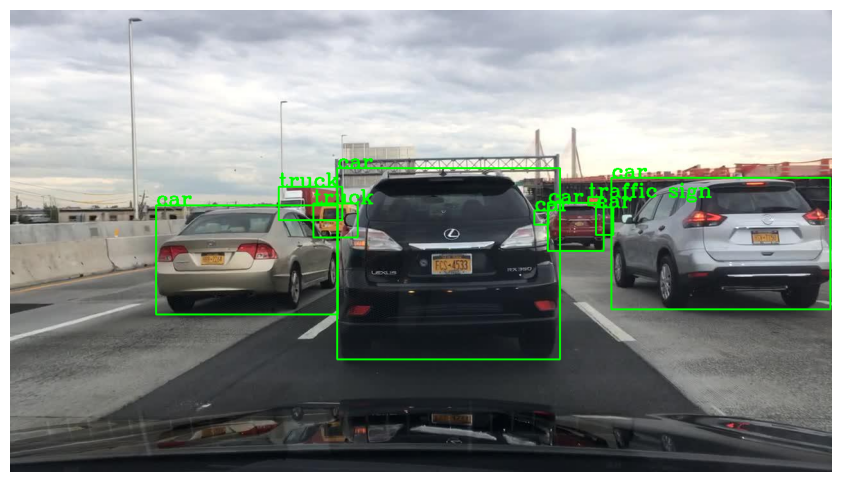

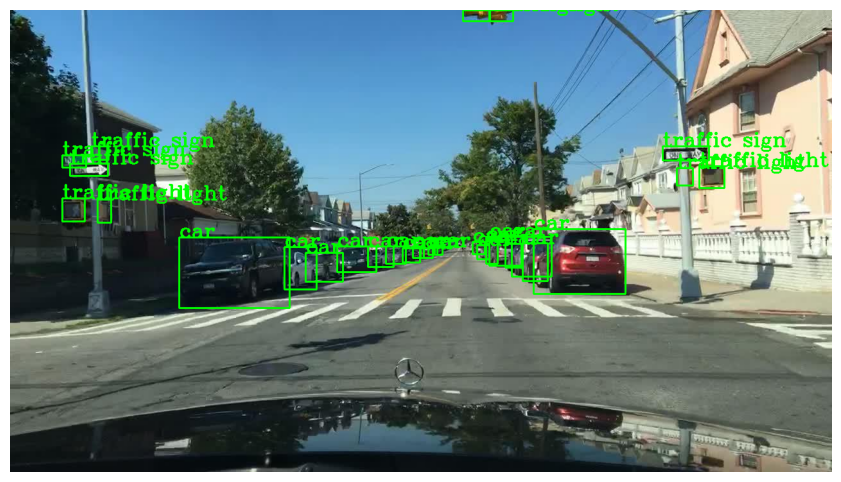

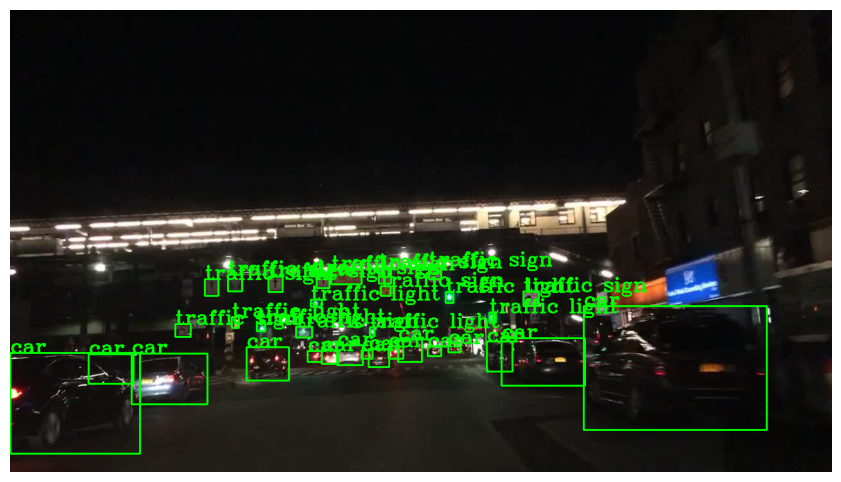

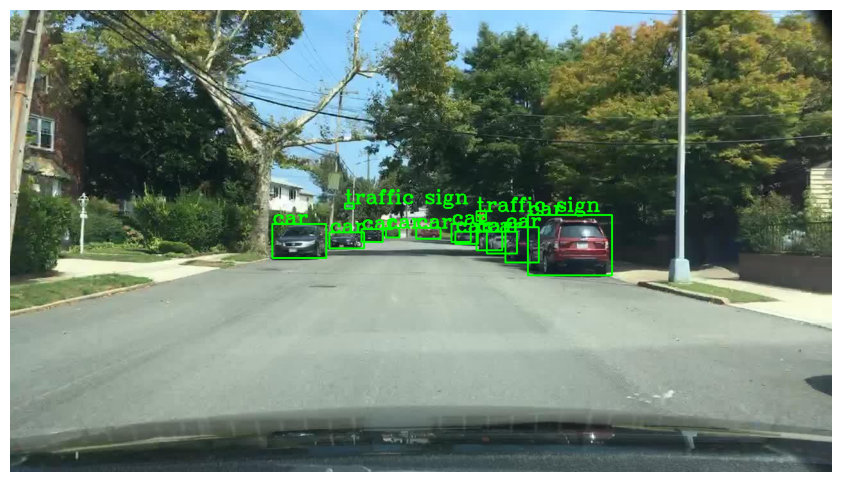

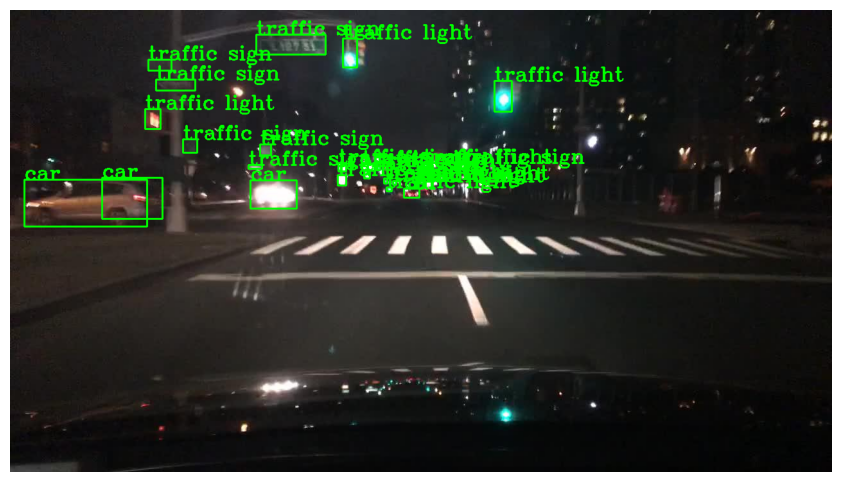

In [ ]:
for i in range(n_samples):
    _, ax = plt.subplots(figsize=(16,6))
    train_path = train_sample[i]
    img_id = train_path.split(os.path.sep)[-1].split('.')[0]
    label_file = os.path.join(TRAIN_PATH, f'{img_id}.txt')
    with open(label_file, 'r') as f:
        lines = f.readlines()
    img = cv2.imread(train_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for label in lines:
        splits = label.split()
        category = labels[int(splits[0])]
        x_center = float(splits[1]) * IMG_WIDTH
        y_center = float(splits[2]) * IMG_HEIGHT
        width = float(splits[3]) * IMG_WIDTH
        height = float(splits[4]) * IMG_HEIGHT

        pt1_x = x_center - width/2
        pt1_y = y_center - height/2
        pt2_x = x_center + width/2
        pt2_y = y_center + height/2

        pt1 = (int(pt1_x), int(pt1_y))
        pt2 = (int(pt2_x), int(pt2_y))

        img = cv2.rectangle(img, pt1=pt1, pt2=pt2, color=(0,255,0), thickness=2)
        img = cv2.putText(img, category, org=pt1,
                          color=(0,255,0), fontFace = cv2.FONT_HERSHEY_COMPLEX,
                          fontScale=1, thickness=2)


    ax.imshow(img)
    ax.axis('off')
    plt.show()

In [ ]:
# Creating data.yaml file
data = {
    'train':os.path.abspath(TRAIN_PATH),
    'val':os.path.abspath(VAL_PATH),
    'names':labels,
    'nc':len(labels)
}

with open('data.yaml', 'w+') as f:
    yaml.safe_dump(data, f)

In [ ]:
# Cloning the ultralytics yolov5 repository
! git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15393, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 15393 (delta 10), reused 3 (delta 1), pack-reused 15369
Receiving objects: 100% (15393/15393), 14.38 MiB | 21.62 MiB/s, done.
Resolving deltas: 100% (10520/10520), done.


In [ ]:
# Installing the dependencies required for YOLO
# ! pip install -r yolov5/requirements.txt

In [ ]:
# ! wandb disabled

In [ ]:
# Training the YOLO model
# ! python ./yolov5/train.py --data ./data.yaml  --batch-size 8  --epochs 100 --weights yolov5/yolov5s.pt

In [ ]:
model = torch.hub.load('yolov5', 'custom', path=MODEL_PATH, source='local')

requirements: YOLOv5 requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 10.3 MB/s eta 0:00:00

requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7037095 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
wheel = cv2.imread(STEERING_WHEEL_PATH)
wheel = cv2.cvtColor(wheel, cv2.COLOR_BGR2GRAY)
rows, cols = wheel.shape

In [ ]:
val_images = glob(f'{VAL_PATH}/*.jpg')

In [ ]:
sample_images = np.random.choice(val_images, size=5)

In [ ]:
# Scope of Improvement

In [ ]:
for i in range(5):
    fig, ax = plt.subplots(figsize=(16,6), nrows=1, ncols=2)
    ax[0].axis('off')
    img = cv2.imread(sample_images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    res = model(img)
    ax[0].imshow(np.squeeze(res.render()))
    ax[1].axis('off')
    res_df = pd.concat(res.pandas().xyxy)
    centriod = res_df[['xmin', 'xmax']].mean(axis=1).mean()
    h = (320-centriod)/320
    h = (h+1)*(h)*(h-1)
    rot = h*630
    M = cv2.getRotationMatrix2D((cols/2,rows/2), rot, 1)
    dst = cv2.warpAffine(wheel, M, (cols,rows))
    ax[1].imshow(dst, cmap='gray')
    plt.show()